<a href="https://colab.research.google.com/github/zaitun1499/AI_lab1/blob/main/Breastcancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ICS 3A Brian Yator
ICS 3A Chakaya Nyamvula
ICS 3A Malonza Muli
ICS 3A Zaitun Nkubitu
ICS 3A Maina Beyene
ICS 3A Atim Paula

1. We have to load the necessary libraries

In [ ]:
import pandas as pd
import pandas.testing as tm
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

2. We have to import our Breast Cancer Data

In [ ]:
from google.colab import files
file = files.upload()

Saving breastcancerdata.csv to breastcancerdata (1).csv


3. We have to load the data into Pandas

In [ ]:
dh = pd.read_csv('breastcancerdata.csv')

In [ ]:
dh.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


4. We have to clean the data

In [ ]:
dh.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

5. Because the column diagnosis is our target variable let's convert it to 1 for yes and 0 for no.

In [ ]:
dh['diagnosis'] = np.where(dh['diagnosis']=='M', 1, 0)

In [ ]:
dh

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


6. We define X as input variable from column 2 to the end and Y as target variable(the diagnosis) column 2

In [ ]:
X=dh.iloc[:,2:]

In [ ]:
Y=dh.iloc[:,1:2]

In [ ]:
X.shape

(569, 30)

In [ ]:
Y.shape

(569, 1)

7. So we split the data into a train and test dataset

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,train_size=0.70,random_state=40)

8. We are defining Sequential Model under ANN for classification

In [ ]:
Classification_Model=Sequential()

In [ ]:
Classification_Model.add(Dense(units=16, activation='relu',input_dim=30))
Classification_Model.add(Dense(units=8,activation='relu'))
Classification_Model.add(Dense(units=6,activation='relu'))
Classification_Model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
Classification_Model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
print(Classification_Model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 16)                496       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________
None


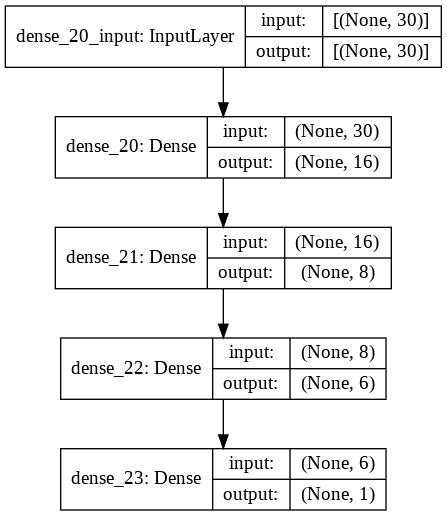

In [ ]:
plot_model(Classification_Model,to_file='model_plot.png',show_shapes=True,show_layer_names=True)

9. We have to train the model with X_train, y_train dataset

In [ ]:
Classification_Model.fit(X_train,y_train,batch_size=1,epochs=50)

Epoch 1/50
398/398 [==============================] - 1s 1ms/step - loss: 1.3010 - accuracy: 0.7350
Epoch 2/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4904 - accuracy: 0.8343
Epoch 3/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4529 - accuracy: 0.8123
Epoch 4/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4661 - accuracy: 0.8404
Epoch 5/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8606
Epoch 6/50
398/398 [==============================] - 0s 1ms/step - loss: 0.3827 - accuracy: 0.8724
Epoch 7/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8576
Epoch 8/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4187 - accuracy: 0.8564
Epoch 9/50
398/398 [==============================] - 0s 1ms/step - loss: 0.5388 - accuracy: 0.8213
Epoch 10/50
398/398 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.8533

10. We can now see our dataset for testing

In [ ]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
295,13.770,13.27,88.06,582.7,0.09198,0.06221,0.010630,0.019170,0.1592,0.05912,0.2191,0.6946,1.479,17.74,0.004348,0.008153,0.004272,0.006829,0.02154,0.001802,14.67,16.93,94.17,661.1,0.1170,0.10720,0.037320,0.05802,0.2823,0.06794
16,14.680,20.13,94.74,684.5,0.09867,0.07200,0.073950,0.052590,0.1586,0.05922,0.4727,1.2400,3.195,45.40,0.005718,0.011620,0.019980,0.011090,0.01410,0.002085,19.07,30.88,123.40,1138.0,0.1464,0.18710,0.291400,0.16090,0.3029,0.08216
431,12.400,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.027990,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.032950,0.048610,0.011670,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.26290,0.240300,0.07370,0.2556,0.09359
453,14.530,13.98,93.86,644.2,0.10990,0.09242,0.068950,0.064950,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.016150,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.14780,0.137300,0.10690,0.2606,0.07810
15,14.540,27.54,96.73,658.8,0.11390,0.15950,0.163900,0.073640,0.2303,0.07077,0.3700,1.0330,2.879,32.55,0.005607,0.042400,0.047410,0.010900,0.01857,0.005466,17.46,37.13,124.10,943.2,0.1678,0.65770,0.702600,0.17120,0.4218,0.13410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,0.2144,0.9961,1.529,15.07,0.005617,0.007124,0.000974,0.002941,0.01700,0.002030,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.014790,0.005769,0.1680,0.06412,0.3416,1.3120,2.275,20.98,0.010980,0.012570,0.010310,0.003934,0.02693,0.002979,11.15,24.62,71.11,380.2,0.1388,0.12550,0.064090,0.02500,0.3057,0.07875
444,18.030,16.85,117.50,990.0,0.08947,0.12320,0.109000,0.062540,0.1720,0.05780,0.2986,0.5906,1.921,35.77,0.004117,0.015600,0.029750,0.009753,0.01295,0.002436,20.38,22.02,133.30,1292.0,0.1263,0.26660,0.429000,0.15350,0.2842,0.08225
414,15.130,29.81,96.71,719.5,0.08320,0.04605,0.046860,0.027390,0.1852,0.05294,0.4681,1.6270,3.043,45.38,0.006831,0.014270,0.024890,0.009087,0.03151,0.001750,17.26,36.91,110.10,931.4,0.1148,0.09866,0.154700,0.06575,0.3233,0.06165


11. We are now using ANN sequential model to predict the target variable (diagnosis) on test data

In [ ]:
prediction=Classification_Model.predict(X_test)
prediction=[1 if y<0.5 else 0 for y in prediction]
prediction

In [ ]:
len(prediction)

171

In [ ]:
type(prediction)

list

In [ ]:
type(y_test)

pandas.core.frame.DataFrame

12. So now from the prediction list we convert it to pandas dataframe

In [ ]:
pred=pd.DataFrame(prediction)

In [ ]:
type(pred)

pandas.core.frame.DataFrame

13. Now converting both pred dataframe and y_test dataframe to numpy ndarray to calculate prediction Accuracy

In [ ]:
pred=pred.values

In [ ]:
y_test_ndarray=y_test.values

14. We code the prediction accuracy

In [ ]:
total = 0
correct = 0
wrong =0

for i in range(len(pred)):
    total = total+1
    if(y_test_ndarray[i]== pred[i]):
      correct = correct+1
    else:
       wrong = wrong+1
print('Total = ' + str(total))
print('Correct = ' + str(correct) + '  Correct percentage: ' + str(round((correct/total)*100, 2))+'%')
print('Wrong = ' + str(wrong) + ' Wrong percentage: ' + str(round((wrong/total)*100, 2)) + '%')

15. Testing model

In [ ]:
len(X_test)

171

16. This input has one row and 30 attributes

In [ ]:
input1=X_test.iloc[[56]]
input1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
213,17.42,25.56,114.5,948.0,0.1006,0.1146,0.1682,0.06597,0.1308,0.05866,0.5296,1.667,3.767,58.53,0.03113,0.08555,0.1438,0.03927,0.02175,0.01256,18.07,28.07,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818


In [ ]:
input1.shape

(1, 30)

In [ ]:
prediction1 = Classification_Model.predict(input1)
prediction1

array([[0.9572802]], dtype=float32)

In [ ]:
prediction1 = ['1' if prediction1>0.5 else '0' for y in prediction1]
prediction1

['1']

17. Finally we check prediction accuracy manually

In [ ]:
dh.loc[(dh['perimeter_mean']==132.90	) & (dh['compactness_mean']==0.07864)]

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
